In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings('ignore')

In [101]:
company = pd.read_csv("companies.csv")

In [102]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [103]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [104]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

# Data cleaning
## 1.Delete irrelevant and redundant information:
## 2.Remove noise or unreliable data (missing values and outliers).

In [105]:
## Delete irrelevant and redundant information:
## 1.a. Delete granularity columns
company.drop(columns=['region', 'city', 'state_code'], inplace=True)
print(company.shape)

(196553, 41)


In [106]:
## 1.b. Delete redundant columns
company.drop(columns=['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 
                      'parent_id', 'created_by', 'created_at', 'updated_at'], inplace=True)
print(company.shape)

(196553, 33)


In [107]:
## 1.c.Delete irrelevant features
company.drop(columns=['domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 
                      'logo_height', 'short_description', 'description', 'overview', 'tag_list', 
                      'name', 'normalized_name', 'permalink', 'invested_companies'], inplace=True)
print(company.shape)

(196553, 19)


In [108]:
## 1.d. Delete duplicate values
company.drop_duplicates(inplace=True)
print(company.duplicated().sum()) 

0


In [109]:
## 1.e. Drop columns with more than 98% null values
threshold = 0.98
null_cols = company.columns[company.isnull().mean() > threshold]
company.drop(columns=null_cols, inplace=True)
print(list(null_cols))
print(company.shape)

['ROI']
(109464, 18)


In [110]:
## 2. Remove noise or unreliable data (missing values and outliers):
## 2.a.Delete instances (rows) with missing values for given columns
company.dropna(subset=['status', 'country_code', 'category_code', 'founded_at'], inplace=True)
print(company.shape)

(63585, 18)


In [111]:
## 2.b.Delete outliers (funding_total_usd, funding_rounds)
# Outlier removal for funding_total_usd
company = company[
    (company['funding_total_usd'] >= company['funding_total_usd'].quantile(0.25)) &
    (company['funding_total_usd'] <= company['funding_total_usd'].quantile(0.75))
]

In [112]:
# Outlier removal for funding_rounds
company = company[
    (company['funding_rounds'] >= company['funding_rounds'].quantile(0.25)) &
    (company['funding_rounds'] <= company['funding_rounds'].quantile(0.75))
]
print(company.shape)

(8651, 18)


In [113]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
36,medical,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2011-09-06,2012-07-10,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822
45,enterprise,operating,2004-01-01,NaN,USA,NaN,NaN,NaN,2011-09-06,2011-09-06,1.0,1500000.0,2010-01-01,2010-01-01,1.0,8.0,47.610150,-122.201516
48,web,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2007-10-01,2007-10-01,1.0,2500000.0,2010-07-01,2012-05-01,2.0,7.0,37.774929,-122.419415
77,software,operating,1996-01-01,NaN,USA,NaN,NaN,NaN,2011-03-01,2012-04-10,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129


## Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds':

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimmin

In [114]:
# ===== Step 1: Find the IQR =====
# For funding_total_usd
Q1_usd = company['funding_total_usd'].quantile(0.25)
Q3_usd = company['funding_total_usd'].quantile(0.75)
IQR_usd = Q3_usd - Q1_usd

# For funding_rounds
Q1_rounds = company['funding_rounds'].quantile(0.25)
Q3_rounds = company['funding_rounds'].quantile(0.75)
IQR_rounds = Q3_rounds - Q1_rounds

print("USD:", Q1_usd, Q3_usd, IQR_usd, " | Rounds:", Q1_rounds, Q3_rounds, IQR_rounds)

USD: 1200000.0 5320000.0 4120000.0  | Rounds: 1.0 2.0 1.0


In [115]:
# ===== Step 2: Find Upper and Lower limit =====
# For funding_total_usd
lower_limit_usd = Q1_usd - 1.5 * IQR_usd
upper_limit_usd = Q3_usd + 1.5 * IQR_usd

# For funding_rounds
lower_limit_rounds = Q1_rounds - 1.5 * IQR_rounds
upper_limit_rounds = Q3_rounds + 1.5 * IQR_rounds

print(lower_limit_usd, upper_limit_usd)
print(lower_limit_rounds, upper_limit_rounds)

-4980000.0 11500000.0
-0.5 3.5


In [116]:
# ===== Step 3: Find Outliers =====
outliers_usd = company[(company['funding_total_usd'] < lower_limit_usd) | (company['funding_total_usd'] > upper_limit_usd)]
outliers_rounds = company[(company['funding_rounds'] < lower_limit_rounds) | (company['funding_rounds'] > upper_limit_rounds)]

print("Outliers in funding_total_usd:", outliers_usd.shape)
print("Outliers in funding_rounds:", outliers_rounds.shape)

Outliers in funding_total_usd: (136, 18)
Outliers in funding_rounds: (0, 18)


In [117]:
# ===== Step 4: Drop Outliers =====
company = company[(company['funding_total_usd'] >= lower_limit_usd) & (company['funding_total_usd'] <= upper_limit_usd)]
company = company[(company['funding_rounds'] >= lower_limit_rounds) & (company['funding_rounds'] <= upper_limit_rounds)]

print("Shape after removing outliers:", company.shape)

Shape after removing outliers: (8515, 18)


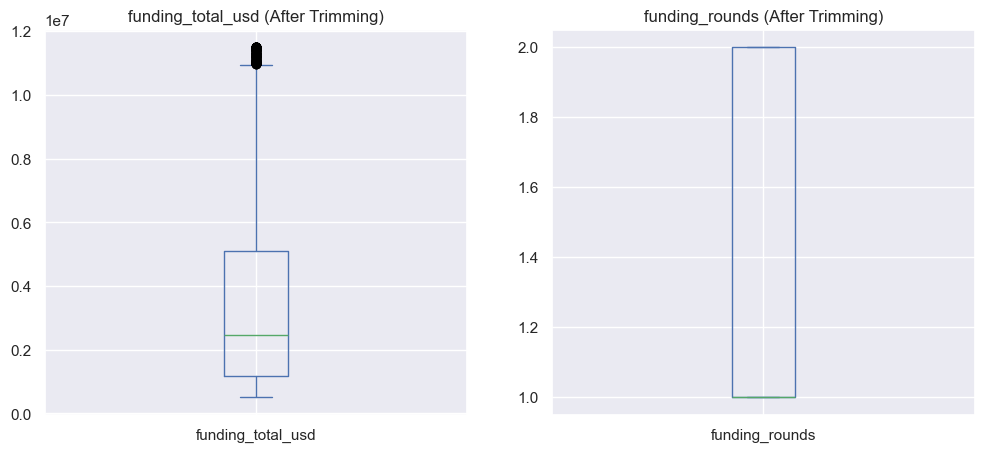

In [118]:
# ===== Step 5: Compare Plots After Trimming =====
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
company['funding_total_usd'].plot(kind='box', title='funding_total_usd (After Trimming)')

plt.subplot(1,2,2)
company['funding_rounds'].plot(kind='box', title='funding_rounds (After Trimming)')

plt.show()

## 2.c. Delete contradictory (mutually opposed or inconsistent data).

In [119]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.
# Find contradictions in one go
contradictions = company[
    ((company['status'] == 'active') & (company['closed_at'].notnull())) |
    ((company['status'] == 'closed') & (company['closed_at'].isnull()))
]
company = company.drop(contradictions.index)
print("Total contradictory rows:", contradictions.shape)

# Drop them
company = company.drop(contradictions.index)

Total contradictory rows: (0, 18)


In [120]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007-10-01,NaN,USA,NaN,NaN,NaN,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
36,medical,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2011-09-06,2012-07-10,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822
45,enterprise,operating,2004-01-01,NaN,USA,NaN,NaN,NaN,2011-09-06,2011-09-06,1.0,1500000.0,2010-01-01,2010-01-01,1.0,8.0,47.610150,-122.201516
48,web,operating,2006-01-01,NaN,USA,NaN,NaN,NaN,2007-10-01,2007-10-01,1.0,2500000.0,2010-07-01,2012-05-01,2.0,7.0,37.774929,-122.419415
77,software,operating,1996-01-01,NaN,USA,NaN,NaN,NaN,2011-03-01,2012-04-10,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129


# B. Date Transformation

In [121]:
#It can be divided into two successive phases.
## 1.a. Changes in original data
# Convert to datetime first
# short & safe: convert each column to datetime (coerce errors) then extract year
date_cols = ['founded_at','closed_at','first_funded_at','last_funding_at','first_milestone_at','last_milestone_at']
date_cols = [c for c in date_cols if c in company.columns]         # keep only existing cols

for c in date_cols:
    company[c] = pd.to_datetime(company[c], errors='coerce').dt.year
    
print(company[date_cols].head())

    founded_at  closed_at  last_funding_at  first_milestone_at  \
13        2007        NaN           2008.0              2008.0   
36        2006        NaN           2012.0                 NaN   
45        2004        NaN           2011.0              2010.0   
48        2006        NaN           2007.0              2010.0   
77        1996        NaN           2012.0                 NaN   

    last_milestone_at  
13             2012.0  
36                NaN  
45             2010.0  
48             2012.0  
77                NaN  


In [122]:
## 1.b.Generalize and categorical data 
company['category_code'] = company['category_code'].str.lower().str.strip()
company['status'] = company['status'].str.lower().str.strip()

print(company.head())

   category_code     status  founded_at  closed_at country_code  \
13           web   acquired        2007        NaN          USA   
36       medical  operating        2006        NaN          USA   
45    enterprise  operating        2004        NaN          USA   
48           web  operating        2006        NaN          USA   
77      software  operating        1996        NaN          USA   

   first_investment_at last_investment_at  investment_rounds first_funding_at  \
13                 NaN                NaN                NaN       2008-02-26   
36                 NaN                NaN                NaN       2011-09-06   
45                 NaN                NaN                NaN       2011-09-06   
48                 NaN                NaN                NaN       2007-10-01   
77                 NaN                NaN                NaN       2011-03-01   

    last_funding_at  funding_rounds  funding_total_usd  first_milestone_at  \
13           2008.0             

In [123]:
##2.Create new variables
#2.a.Create new feature isClosed from closed_at and status
company["isClosed"] = ((company["closed_at"].notnull()) | (company["status"] == "closed")).astype(int)
print(company[["closed_at", "status", "isClosed"]])

        closed_at     status  isClosed
13            NaN   acquired         0
36            NaN  operating         0
45            NaN  operating         0
48            NaN  operating         0
77            NaN  operating         0
...           ...        ...       ...
196497        NaN  operating         0
196517        NaN  operating         0
196525        NaN  operating         0
196540     2012.0     closed         1
196549        NaN  operating         0

[8515 rows x 3 columns]


In [124]:
## 2.b.Create new feature 'active_days'
company['founded_at'] = pd.to_datetime(company['founded_at'], errors='coerce')
company['closed_at'] = pd.to_datetime(company['closed_at'], errors='coerce')

company['active_days'] = (company['closed_at'] - company['founded_at']).dt.days
print(company['active_days'])

13        NaN
36        NaN
45        NaN
48        NaN
77        NaN
         ... 
196497    NaN
196517    NaN
196525    NaN
196540    0.0
196549    NaN
Name: active_days, Length: 8515, dtype: float64


In [125]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
13,web,acquired,1970-01-01 00:00:00.000002007,NaT,USA,NaN,NaN,NaN,2008-02-26,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,37.386052,-122.083851,0,NaN
36,medical,operating,1970-01-01 00:00:00.000002006,NaT,USA,NaN,NaN,NaN,2011-09-06,2012.0,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822,0,NaN
45,enterprise,operating,1970-01-01 00:00:00.000002004,NaT,USA,NaN,NaN,NaN,2011-09-06,2011.0,1.0,1500000.0,2010.0,2010.0,1.0,8.0,47.610150,-122.201516,0,NaN
48,web,operating,1970-01-01 00:00:00.000002006,NaT,USA,NaN,NaN,NaN,2007-10-01,2007.0,1.0,2500000.0,2010.0,2012.0,2.0,7.0,37.774929,-122.419415,0,NaN
77,software,operating,1970-01-01 00:00:00.000001996,NaT,USA,NaN,NaN,NaN,2011-03-01,2012.0,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129,0,NaN


#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [126]:
# founded_at
company['founded_at'] = pd.to_datetime(company['founded_at'], errors='coerce').dt.year

# closed_at
company['closed_at'] = pd.to_datetime(company['closed_at'], errors='coerce').dt.year

# first_funding_at
company['first_funding_at'] = pd.to_datetime(company['first_funding_at'], errors='coerce').dt.year

# last_funding_at
company['last_funding_at'] = pd.to_datetime(company['last_funding_at'], errors='coerce').dt.year

# first_milestone_at
company['first_milestone_at'] = pd.to_datetime(company['first_milestone_at'], errors='coerce').dt.year

# last_milestone_at
company['last_milestone_at'] = pd.to_datetime(company['last_milestone_at'], errors='coerce').dt.year

In [127]:
# Column datatype check
print(company['founded_at'].dtype)

# Top 5 rows 
print(company['founded_at'].head())

# Null (missing) values count
print(company['founded_at'].isnull().sum())

int32
13    1970
36    1970
45    1970
48    1970
77    1970
Name: founded_at, dtype: int32
0


In [128]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
13,web,acquired,1970,NaN,USA,NaN,NaN,NaN,2008.0,1970.0,1.0,5000000.0,1970.0,1970.0,3.0,14.0,37.386052,-122.083851,0,NaN
36,medical,operating,1970,NaN,USA,NaN,NaN,NaN,2011.0,1970.0,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822,0,NaN
45,enterprise,operating,1970,NaN,USA,NaN,NaN,NaN,2011.0,1970.0,1.0,1500000.0,1970.0,1970.0,1.0,8.0,47.610150,-122.201516,0,NaN
48,web,operating,1970,NaN,USA,NaN,NaN,NaN,2007.0,1970.0,1.0,2500000.0,1970.0,1970.0,2.0,7.0,37.774929,-122.419415,0,NaN
77,software,operating,1970,NaN,USA,NaN,NaN,NaN,2011.0,1970.0,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129,0,NaN


#### 1.b. Generalize the categorical data i.e. category_code and  country_code

In [129]:
#1. category_code
df = pd.get_dummies(company, columns=['category_code'])
print(df.head())

       status  founded_at  closed_at country_code first_investment_at  \
13   acquired        1970        NaN          USA                 NaN   
36  operating        1970        NaN          USA                 NaN   
45  operating        1970        NaN          USA                 NaN   
48  operating        1970        NaN          USA                 NaN   
77  operating        1970        NaN          USA                 NaN   

   last_investment_at  investment_rounds  first_funding_at  last_funding_at  \
13                NaN                NaN            2008.0           1970.0   
36                NaN                NaN            2011.0           1970.0   
45                NaN                NaN            2011.0           1970.0   
48                NaN                NaN            2007.0           1970.0   
77                NaN                NaN            2011.0           1970.0   

    funding_rounds  ...  category_code_real_estate  category_code_search  \
13        

In [130]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.

top_10 = company['category_code'].value_counts().head(10).index   # Top 10 categories
company['category_code'] = company['category_code'].apply(lambda x: x if x in top_10 else 'other')   # Replace others with 'other'
print(company['category_code'].value_counts())

category_code
other          2510
software       1617
biotech         806
web             786
mobile          612
enterprise      484
ecommerce       436
games_video     380
advertising     356
hardware        304
analytics       224
Name: count, dtype: int64


In [131]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.

## Category count
cat_counts = company['category_code'].value_counts()
top_cats = cat_counts[cat_counts > 10].index
company['category_code'] = company['category_code'].apply(lambda x: x if x in top_cats else 'other') #For replace it with other
print(company['category_code'].value_counts())

category_code
other          2510
software       1617
biotech         806
web             786
mobile          612
enterprise      484
ecommerce       436
games_video     380
advertising     356
hardware        304
analytics       224
Name: count, dtype: int64


In [132]:
# Let's check if we've more than 15 columns
if df.shape[1] > 15:
    print("Yes, we have more than 15 columns")
else:
    print("We have 15 or fewer columns")

Yes, we have more than 15 columns


In [133]:
company.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
13,web,acquired,1970,NaN,USA,NaN,NaN,NaN,2008.0,1970.0,1.0,5000000.0,1970.0,1970.0,3.0,14.0,37.386052,-122.083851,0,NaN
36,other,operating,1970,NaN,USA,NaN,NaN,NaN,2011.0,1970.0,2.0,11300000.0,NaN,NaN,NaN,2.0,42.018989,-71.007822,0,NaN
45,enterprise,operating,1970,NaN,USA,NaN,NaN,NaN,2011.0,1970.0,1.0,1500000.0,1970.0,1970.0,1.0,8.0,47.610150,-122.201516,0,NaN
48,web,operating,1970,NaN,USA,NaN,NaN,NaN,2007.0,1970.0,1.0,2500000.0,1970.0,1970.0,2.0,7.0,37.774929,-122.419415,0,NaN
77,software,operating,1970,NaN,USA,NaN,NaN,NaN,2011.0,1970.0,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129,0,NaN


#  One-hot encoding to category_code
import pandas as pd
data = {'category_code': ['software', 'hardware', 'software', 'web']}
company = pd.DataFrame(data)
company = pd.get_dummies(company, columns=['category_code'], dtype=int)

print(company)

# Concatenate category with company dataset
company = pd.DataFrame({'id': [1, 2, 3]})
category = pd.DataFrame({
    'category_software': [1, 0, 1],
    'category_web': [0, 1, 0]
})

company = pd.concat([company, category], axis=1)
print(company)

In [134]:
# Since, We've added the encoded category_columns, let's delete original category_code
company.drop('category_code', axis=1, inplace=True, errors='ignore')
print(company.columns)

Index(['status', 'founded_at', 'closed_at', 'country_code',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'active_days'],
      dtype='object')


### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [135]:
import os
print(os.getcwd())

C:\Users\Lenovo


In [151]:
import pandas as pd

company = pd.read_csv('companies.csv')
print(company.columns.tolist())
print(company.head())

['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name', 'normalized_name', 'permalink', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region', 'first_investment_at', 'last_investment_at', 'investment_rounds', 'invested_companies', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'created_by', 'created_at', 'updated_at', 'lat', 'lng', 'ROI']
        id  Unnamed: 0.1 entity_type  entity_id  parent_id  \
0      c:1             0     Company          1        NaN   
1     c:10             1     Company         10        NaN   
2    c:100             2     Company        100        NaN   
3  c:10000             3     Company      10000        NaN   
4  c:10001             4     Compa

In [152]:
# Remove any extra spaces in column names
company.columns = company.columns.str.strip()

#Create isClosed feature based on status
company['isClosed'] = company['status'].apply(
    lambda x: 1 if str(x).lower() in ['operating', 'ipo'] else (0 if str(x).lower() in ['acquired', 'closed'] else None)
)

# Check rows where isClosed couldn't be assigned (missing)
missing_isClosed = company[company['isClosed'].isnull()]
print("Rows with missing isClosed value:")
print(missing_isClosed[['status', 'isClosed']])

# Remove rows with missing isClosed value (if any)
company = company[company['isClosed'].notnull()]

# Final counts of isClosed values
print("\nCounts of isClosed values:")
print(company['isClosed'].value_counts())

# Optional: Save the updated cleaned data with isClosed column to CSV
company.to_csv('cleaned_startup_data_with_isClosed.csv', index=False)

Rows with missing isClosed value:
Empty DataFrame
Columns: [status, isClosed]
Index: []

Counts of isClosed values:
isClosed
1    184575
0     11978
Name: count, dtype: int64


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days,
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

In [153]:
# i. Replacing values:
company.loc[company['status'].isin(['operating', 'ipo']), 'closed_at'] = pd.to_datetime('2021-12-31')
company.loc[company['status'].isin(['acquired', 'closed']), 'closed_at'] = 0

In [154]:
# ii. Replacing values:
company['founded_at'] = pd.to_datetime(company['founded_at'], errors='coerce')
company['closed_at'] = pd.to_datetime(company['closed_at'], errors='coerce')

company['active_days'] = (company['closed_at'] - company['founded_at']).dt.days

print(company[company['active_days'] < 0][['founded_at', 'closed_at', 'active_days', 'status']])

       founded_at  closed_at  active_days    status
13     2007-10-01 1970-01-01     -13787.0  acquired
16     2008-08-22 1970-01-01     -14113.0    closed
18     2008-03-01 1970-01-01     -13939.0  acquired
63     1986-01-01 1970-01-01      -5844.0  acquired
66     2005-01-01 1970-01-01     -12784.0  acquired
...           ...        ...          ...       ...
196519 2003-01-01 1970-01-01     -12053.0  acquired
196524 2005-11-01 1970-01-01     -13088.0  acquired
196526 2008-05-22 1970-01-01     -14021.0    closed
196540 2006-06-01 1970-01-01     -13300.0    closed
196541 2007-01-01 1970-01-01     -13514.0  acquired

[6645 rows x 4 columns]


In [155]:
# iii. Replacing values:
company.drop(columns=['closed_at'], inplace=True)
print(company.columns)

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width',
       'logo_height', 'short_description', 'description', 'overview',
       'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI', 'isClosed',
       'active_days'],
      dtype='object')


##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [156]:
# Step 1: closed_at column create 
if 'closed_at' not in company.columns:
    company['closed_at'] = np.nan

In [157]:
# Step 2: status basisclosed_ value replace
company.loc[company['status'].isin(['operating', 'ipo']), 'closed_at'] = 2021
company.loc[company['status'].isin(['acquired', 'closed']), 'closed_at'] = 0

In [158]:
print(company[['status', 'closed_at']].head(10))

      status  closed_at
0  operating     2021.0
1   acquired        0.0
2   acquired        0.0
3  operating     2021.0
4  operating     2021.0
5  operating     2021.0
6  operating     2021.0
7  operating     2021.0
8  operating     2021.0
9  operating     2021.0


##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [159]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,relationships,created_by,created_at,updated_at,lat,lng,ROI,isClosed,active_days,closed_at
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5,1,5919.0,2021.0
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN,0,NaN,0.0
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN,0,NaN,0.0
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN,1,4906.0,2021.0
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN,1,4906.0,2021.0


In [160]:
print(company.columns.tolist())

['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name', 'normalized_name', 'permalink', 'category_code', 'status', 'founded_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region', 'first_investment_at', 'last_investment_at', 'investment_rounds', 'invested_companies', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'created_by', 'created_at', 'updated_at', 'lat', 'lng', 'ROI', 'isClosed', 'active_days', 'closed_at']


In [161]:
import numpy as np
import pandas as pd

# Create closed_at column if it does not exist
if 'closed_at' not in company.columns:
    company['closed_at'] = np.nan

# Set closed_at based on status
company.loc[company['status'].isin(['operating', 'ipo']), 'closed_at'] = '2021-12-31'
company.loc[company['status'].isin(['acquired', 'closed']), 'closed_at'] = np.nan

# Convert closed_at and founded_at to datetime
company['closed_at'] = pd.to_datetime(company['closed_at'], errors='coerce')
company['founded_at'] = pd.to_datetime(company['founded_at'], errors='coerce')

# Calculate active_days
company['active_days'] = (company['closed_at'] - company['founded_at']).dt.days

# Find contradictory records where active_days < 0 or missing
contradictory = company[(company['active_days'] < 0) | (company['active_days'].isna())]

print("Contradictory records:")
print(contradictory[['founded_at', 'closed_at', 'active_days', 'status']])

Contradictory records:
       founded_at  closed_at  active_days     status
1             NaT        NaT          NaN   acquired
2             NaT        NaT          NaN   acquired
7             NaT 2021-12-31          NaN  operating
8             NaT 2021-12-31          NaN  operating
13     2007-10-01        NaT          NaN   acquired
...           ...        ...          ...        ...
196536        NaT 2021-12-31          NaN  operating
196539        NaT 2021-12-31          NaN  operating
196540 2006-06-01        NaT          NaN     closed
196541 2007-01-01        NaT          NaN   acquired
196546        NaT 2021-12-31          NaN  operating

[112068 rows x 4 columns]


#### 2.b.iii. Then, delete the closed_at column.

In [162]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,relationships,created_by,created_at,updated_at,lat,lng,ROI,isClosed,active_days,closed_at
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5,1,5919.0,2021-12-31
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN,0,NaN,NaT
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN,0,NaN,NaT
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN,1,4906.0,2021-12-31
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN,1,4906.0,2021-12-31


In [164]:
company.drop(columns=['closed_at'], inplace=True, errors='ignore')

### Let's work on target variabe now.

In [165]:
# Target variable
target = company['status']
print(target.value_counts())

status
operating    183441
acquired       9394
closed         2584
ipo            1134
Name: count, dtype: int64


### Remove the null values with the mean value in 'Numerical Data'

In [166]:
# Numeric columns  missing values fill 
numeric_cols = company.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    mean_val = company[col].mean()
    company[col].fillna(mean_val, inplace=True)

print(company[numeric_cols].isnull().sum())

Unnamed: 0.1               0
entity_id                  0
parent_id             196553
logo_width                 0
logo_height                0
investment_rounds          0
invested_companies         0
funding_rounds             0
funding_total_usd          0
milestones                 0
relationships              0
lat                        0
lng                        0
ROI                        0
isClosed                   0
active_days                0
dtype: int64


In [167]:
# First let's check how much of rows has nan values and drop them.
nan_rows_count = company.isnull().any(axis=1).sum()
print(f"Number of rows with at least one NaN value: {nan_rows_count}")

Number of rows with at least one NaN value: 196553


In [168]:
company = company.dropna()
print(company.isnull().sum().sum())

0


In [169]:
# Final check: total missing values in the entire DataFrame
print("Total missing values in data:", company.isnull().sum().sum())

Total missing values in data: 0


In [170]:
company.to_csv('cleaned_startup_data_processed.csv', index=False)

In [171]:
print(company.shape)       # Rows, columns ka count check karo
print(company.head())     # Pehle 5 rows dikhao

(0, 45)
Empty DataFrame
Columns: [id, Unnamed: 0.1, entity_type, entity_id, parent_id, name, normalized_name, permalink, category_code, status, founded_at, domain, homepage_url, twitter_username, logo_url, logo_width, logo_height, short_description, description, overview, tag_list, country_code, state_code, city, region, first_investment_at, last_investment_at, investment_rounds, invested_companies, first_funding_at, last_funding_at, funding_rounds, funding_total_usd, first_milestone_at, last_milestone_at, milestones, relationships, created_by, created_at, updated_at, lat, lng, ROI, isClosed, active_days]
Index: []

[0 rows x 45 columns]


In [ ]:
print(company.shape)  # (rows, columns)